# ACSE-7 (Inversion and Optimisation)  <a class="tocSkip"></a>

# Homework Lecture 2: Unconstrained Optimisation <a class="tocSkip"></a>

In [1]:
import numpy as np
import scipy.linalg as sl
import matplotlib.pyplot as plt
# font sizes for plots
plt.rcParams['font.size'] = 16
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Dejavu Sans']

In [2]:
%matplotlib inline

# Identifying Local Minima

Find the stationary points of the following functions analytically and identify which ones are local minima, without making any graphs.

* $f(x) = x^3 + 6 x^2 - 63 x + 1$

* $f(x) = -\ln(\cos(x)+1)$

* $f(x, y) = x^4 + y^4 + 2 x^2 y^2 - 2 x^2 + 2 y^2$

# Symmetric Positive Definite and Positive Semi-Definite Matrices
* For the following matrices compute the eigenvalues (either analytically or use [`scipy.linalg.eigh`](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.linalg.eigh.html)), and determine which ones are positive definite, and which ones are positive semi-definite, and which ones are neither.

\begin{align*}
  \underline{\mathbf A}_1 &= \begin{pmatrix}
    2 & 1 \\ 1 & 2
  \end{pmatrix} &
  \underline{\mathbf A}_2 &= \begin{pmatrix}
    -2 & 1 \\ 1 & -2
  \end{pmatrix} \\
  \underline{\mathbf A}_3 &= \begin{pmatrix}
    1 & -1 \\ -1 & 1
  \end{pmatrix} &
  \underline{\mathbf A}_4 &= \begin{pmatrix}
    -1 & 2 \\ 2 & -1
  \end{pmatrix}
\end{align*}

* In the following 4 figures we have plotted the graph of $f({\bf x}) = {\bf x}^T\underline{\mathbf A}_i{\bf x}$ for $i=1,2,3,4$ in random order. Can you figure out which matrix $\underline{\mathbf A}_i$ corresponds to which figure?

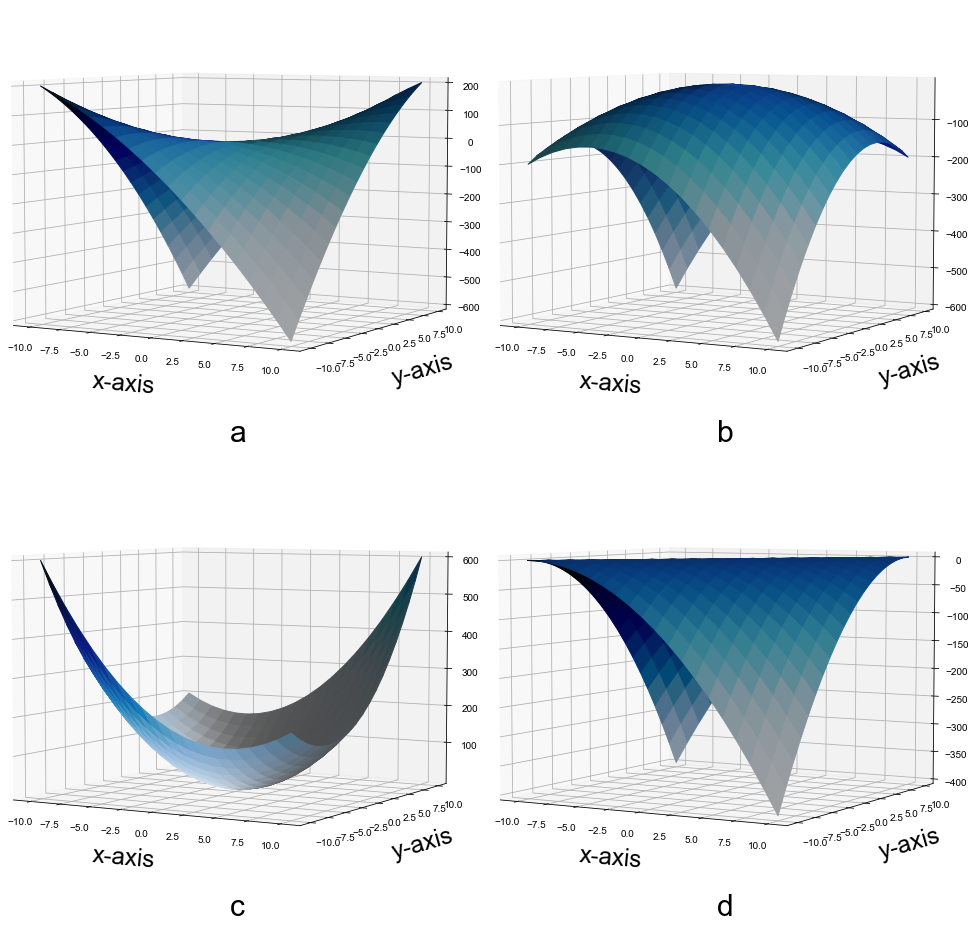

# Quadratic functions
Suppose we have $n$ different locations (say in 2D) each given by a vector $\bf{\hat x}_i=(\hat x_{i,1}, \hat x_{i,2})$ and we like to find a new location ${\bf x}=(x_1, x_2)$ that is close to all of these. We could measure the total distance between ${\bf x}$ and the other locations as

$$
  \text{dist}({\bf x}) = \sum_{i=1}^n \| {\bf x} - \bf{\hat x}_i \| = \sum_i \sqrt{(x_1-{\hat x}_{i,1})^2 + (x_2-{\hat x}_{i,2})^2}
$$

To simplify matters a little however, we decide to use the squared distance as our measure of choice

$$
  \text{dist}^2({\bf x}) = \sum_{i=1}^n \| {\bf x} - \bf{\hat x}_i \|^2 = \sum_i (x_1-{\hat x}_{i,1})^2 + (x_2-{\hat x}_{i,2})^2
$$

This is clearly a quadratic function in ${\bf x}$.

* try to write $\text{dist}^2({\bf x})$ in the standard form:
$$
  \text{dist}^2({\bf x}) = \tfrac 12{\bf x}\underline{\mathbf A}{\bf x} - {\bf b}^T{\bf x} + c,
$$
in other words find expressions for the entries of the $2\times 2$-matrix $\underline{\mathbf A}$, the 2 entries of the vector ${\bf b}$ and for the scalar $c$.

**Hint**: as a first step we can work out $\text{dist}^2({\bf x})$ a little further

\begin{align*}
  \text{dist}^2({\bf x}) &= \sum_{i=1}^n x_1^2 -2 x_1 \hat{x}_{i,1} + \hat{x}_{i,1}^2 
  + x_2^2 -2 x_2 \hat{x}_{i,2} + \hat{x}_{i,2}^2 \\
  &= n x_1^2 + n x_2^2 -2 \left(\sum_{i=1}^n \hat{x}_{i,1}\right) x_1  - 2\left(\sum_{i=1}^n
  \hat{x}_{i,2}\right) x_2 + \sum_{i=1}^n  \hat{x}_{i,1}^2 + \hat{x}_{i,2}^2
\end{align*}

to make it clear what the different terms in $x_1$ and $x_2$ are.

* Using the standard quadratic form, find the minimum of $\text{dist}^2({\bf x})$. Try to find an expression as simple as possible and explain the answer in words.

Do you expect the minimum of $\text{dist}({\bf x})$ (see its definition above *with* the square roots) to be the same location? The function $\text{dist}({\bf x})$ is a more general nonlinear function which we'll learn how to minimize numerically in the next lecture.

# Conjugate Gradient Method
* Solve the following, simple linear system using the Conjugate Gradient method *by hand*:

$$
  \begin{pmatrix}
    1 & 0 \\
    0 & 2 
  \end{pmatrix}
  \begin{pmatrix}
     x \\ y
  \end{pmatrix}
  =
  \begin{pmatrix}
    1 \\ 1
  \end{pmatrix}
$$

using ${\bf x}^{(0)}=(0,0)^T$ as the initial guess.
<br><br>
Draw the vector ${\bf x}^{(1)}-{\bf x}^{(0)}$ and ${\bf x}^{(2)}-{\bf x}^{(1)}$. Are they orthogonal? Are they perhaps $\underline{\mathbf A}$-orthogonal? What about ${\bf r}^{(0}$ and ${\bf r}^{(1)}$ ?

# Portfolio Selection
In this exercise we will look at how we can combine some simple statistical analysis with our knowledge about minimizing quadratic functions to help us select a portfolio of stocks in such a way that we can balance the expected return and the risk.

For the analysis we can download stock price data for a selection of stocks with the code below (this requires a "pip install" of `pandas_datareader`)

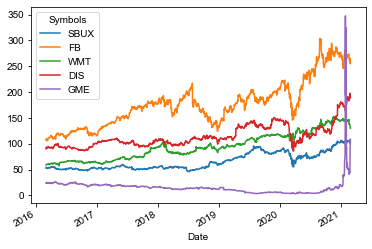

In [7]:
import pandas_datareader.data as stock_data
import datetime
# period of analysis: last 5 years
end = datetime.datetime.now()
start = end - datetime.timedelta(days=365*5)
# our selection of stocks (Starbucks, Facebook, Walmart, Disney, and GameStop
# you can choose whatever other selection you want from https://iextrading.com/trading/eligible-symbols/
stocks = ['SBUX', 'FB', 'WMT', 'WST', 'DIS']
stocks = ['SBUX', 'FB', 'WMT', 'DIS', 'GME']

# read the data, plot it and write to a .csv
f = stock_data.DataReader(stocks, 'stooq', start, end)
# we use the closing prices as our time series
ax1 = f['Close'].plot()
f['Close'].to_csv('stocks.csv')

# create a m x n array for n stocks with closing prices of m days
# note that we need to reverse the timeseries to make it forward in time
p = np.array(f['Close'])[::-1, :]

Alternatively, you can read the data for this selection from the `stocks.csv` datafile provided with this lecture

In [8]:
p = np.genfromtxt('stocks.csv', delimiter=',', skip_header=1, usecols=(1,2,3,4,5))[::-1, :]

## Covariance Matrix
The covariance matrix $\mathbf{\Sigma}$ is an important tool in statistics and probability theory. For $n$ different signals/time series/random variables $X_i$ of data, it computes the covariance between the different pairs of data. The entries are given by

$$
  \Sigma_{ij} = \mathop{Cov}(X_i, X_j) =
  \left\langle\left(X_i - \mu_i \right)\left(X_j - \mu_j\right)\right\rangle
$$

where $\langle\cdot\rangle$ is the mean (or expectation value in the context of random variables in probability theory), and $\mu_i$ are the means of the data

$$
  \mu_i = \left\langle X_i \right\rangle
$$

Note that the elements on the diagonal indicate the variance of the individual data series: $\Sigma_{ii} = \sigma^2(X_i)$, a measure of the spread of the values from their mean. If $Y$ is a linear combination of the $n$ data series:

$$
  Y = \sum w_i X_i
$$

with weights $w_i$ forming a vector ${\bf w}\in \mathbb{R}^n$, then variance of $Y$ can be calculated, using the $\Sigma$ matrix, as:

\begin{align*}
  {\bf w}^T\Sigma{\bf w}
  &=
  \sum_{i, j} \left\langle w_i\left(X_i - \mu_i \right)w_j\left(X_j - \mu_j\right)\right\rangle \\
  &=
  \left\langle\left( Y - \sum_i w_i\mu_i \right)\left(Y - \sum_j w_j\mu_j\right)\right\rangle \\
  &=
  \left\langle\left( Y - \left\langle Y\right\rangle \right)\left( Y - \left\langle Y\right\rangle \right)\right\rangle \\
  &= \left\langle\left( Y - \left\langle Y\right\rangle \right)^2\right\rangle
  = \sigma^2(Y)
\end{align*}

* Show that the covariance matrix is symmetric, and positive *semi*-definite, but is not always symmetric positive definite (SPD). Hint: for a counter example, assume that the data series $X_i$ are *not* linearly independent; Then (by definition) there is a linear combination such that $\sum_i w_i X_i = 0$. Can you find another counter-example?

The covariance matrix for this data can be computed using numpy's [cov](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.cov.html) function. Note that the data that is provided in the first argument should have a shape of $n\times m$, where $n$ is the number of time series (different stocks) and $m$ the number of values in each series:

In [9]:
print(p.T.shape)
sigma = np.cov(p.T)
print(sigma.shape)

(5, 1259)
(5, 5)


* Check that the matrix `sigma` is indeed symmetric, and use the function `eigh` in `scipy.linalg` to check that $\Sigma$ in this case is in fact SPD.

## Portfolio Selection
Using this data we can perform a simplified optimisation for the selection of a number of stocks balancing the conflicting objectives of profit maximisation and risk reduction. **NOTE**: historic time-series of stock prices should *not* be used as a prediction of return of investment in real-life.

A very simplistic model for the return of investment of a stock, is to look at its day-to-day change in closing price. So if for each of the $n$ stocks, we have $m$ days of closing prices, we create a new array of $m-1$ entries containing the difference between the next day's closing price and the current day's closing price. Then, we turn it into a rate of return by dividing by the daily stock price. So if $p_{i,j}$ is the prize of stock $i$ on day $j$, our rate of return is calculated as

$$
  R_{i,j} = \frac{p_{i,j+1}-p_{i,j}}{p_{i,j}}, \;
  \text{ for }
  1\leq i\leq n, \; 1\leq j\leq m-1
$$

This represents the amount returned for each pound/dollar invested (our sample data is of American stocks, so from now on we'll assume dollars). Let's apply this to the data above:

In [12]:
R = (p[1:,:]-p[0:-1,:])/p[0:-1]

An investor would like to buy a selection of the $n$ different stocks (the portfolio). Let $w_i$ be the amount of money invested in each stock. The expected return for this investment is

$$
  \langle R({\bf w})\rangle = \sum_i w_i \langle R_i\rangle
$$

A measure of the volatility of the investment, and thus the risk, is the variance

$$
  \sigma^2(R({\bf w})) = \sum_{i=1}^n \sum_{j=1}^n w_i\Sigma_{ij}w_j
$$

If the investor wants to find a portfolio that balances the amount of risk (measured by the variance), and the return of investment, he could minimise a function of the following form

$$
   f({\bf w}) = \sigma^2(R({\bf w})) - q \langle R({\bf w})\rangle
$$

Here $q$ is a chosen parameter $q\geq 0$ that balances how much the return should weigh against risk. For a low value of $q$ reducing the risk is deemed to be more important. For a large value of $q$ obtaining a large return is more important. Note the minus sign in front of the $R$ term: by *minimizing* $f$ we *maximize* the return.

We can write $f$ in vector form and recognize it as a standard quadratic function

$$
  f({\bf w}) = {\bf w}^T \Sigma{\bf w} - q {\bf r}^T{\bf w}
$$

* Using a value of $q=0.33$, compute the optimal portfolio by minimizing $f({\bf w})$.

* Check that the optimal portfolio ${\bf w}$ satisfies $\sum w_i\approx 1$. This means our portfolio sums to roughly a dollar, and thus the values $w_i$ reflect which fraction of a dollar we should spend on each stock. Compute the variance of the optimal portfolio and compare this with the diagonal of $\mathbf{\Sigma}$. Remember, the diagonal entries represent the variance in the return for each stock individually.

* Similarly, check the expected daily return for our portfolio and compare that with expected return for the individual stocks given by the entries $r_i$ of ${\bf r}$.

* Now, repeat, the same questions for a value of $q=33$

The results of the last question might be a little counter-intuitive. It seems the fraction of each stock that is suggested is exactly the same, it's just that we're advised to buy a hundred times more of each stock. On the one hand this is expected by the fact that we're actually just solving $\mathbf{\Sigma}{\bf w}=q{\bf r}$, and thus
if we multiply the right-hand side by a factor of a hundred, then the solution is also simply multiplied by that factor.

On
the other hand we were asking for a much more risky investment by increasing $q$ by a factor of a hundred. 
This can be explained by the fact that although the return has also increased by a factor of a hundred, the variance has actually increased by a factor of $100^2$, and thus we are getting an investment in which the variance is much higher than when we were using $q=0.3$.

You might argue that we should have used the square root of the variance (standard deviation) as a measure of risk. Or that we should have normalized the return, into a return per dollar (dividing by $\sum_i w_i$), and similarly normalizing the variance (dividing it by the square of $\sum_i w_i$) so that the two are comparable. This does make the function $f({\bf w})$ a little more complicated.

A simpler solution is to minimize $f({\bf w})$ with the *constraint* that $\sum_i w_i=1$, i.e. we are asking what the optimal investment is for a single dollar. Another reason to introduce constraints, is that the naive optimisation here allows negative values for $w_i$, i.e. that we should buy a negative amount of a certain stock. This could be interpreted in terms of derivatives, but in general might not be desired. A reasonable constraint could therefore be that $w_i \geq 0$. We will learn how to do this in lecture 6.